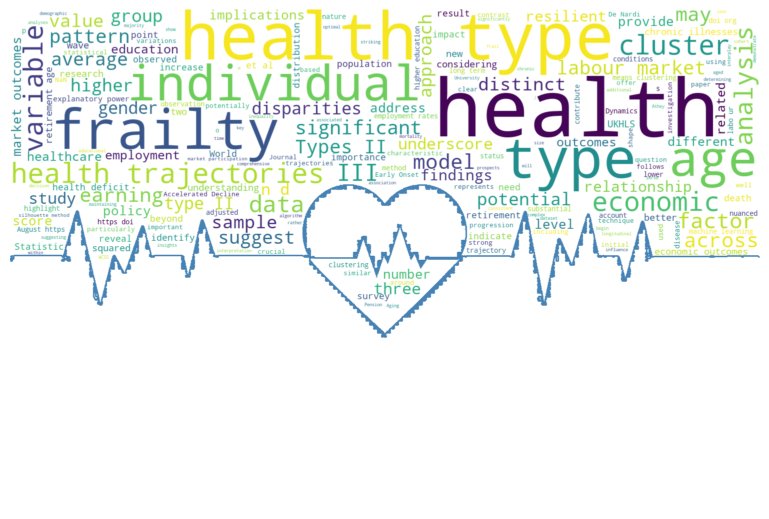

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PyPDF2

# Read the full text of the dissertation
text = ""
with open('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Qu_Thesis_MSc_Final.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    for page in reader.pages:
        text += page.extract_text()

# Add custom stopwords
stopwords = set(STOPWORDS)
custom_stopwords = {'the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'that', 'this'}
stopwords.update(custom_stopwords)

# Create a mask image (assuming you have a mask image file)
mask = np.array(Image.open("mask_image.png"))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      stopwords=stopwords,
                      mask=mask,
                      contour_width=3,
                      contour_color='steelblue').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# Save the image
plt.savefig('thsis_wordcloud.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()